To perform the sentiment analysis task on this Twitter data using one of the  Deep Learning Classifier (Keras model) for text data

Importing the required libraries for Sentiment Analysis using Keras

In [2]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow.python.keras.layers import Input, Dense 
from keras.preprocessing.text import text_to_word_sequence 
from keras.preprocessing.text import Tokenizer 
import collections

import matplotlib.pyplot as plt 
import nltk 
from nltk import word_tokenize 
from nltk.corpus import stopwords 
nltk.download('stopwords') 
nltk.download('punkt') #divides a text into a list of sentences by using an unsupervised algorithm 
from nltk.stem import PorterStemmer 
from keras import Sequential 
from keras import layers

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kallu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kallu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Reading the data from given path using pandas

In [3]:
twitter_data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
twitter_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Checking for null values in the Label and tweet columns of data

In [4]:
twitter_data[twitter_data.tweet.isnull() == True]
twitter_data[twitter_data.label.isnull() == True]

,id,label,tweet


Removing @user from the twitter data

In [5]:
twitter_data['tweet'] = twitter_data.tweet.str.replace('@[^\s]+', '')
twitter_data.head(10)

C:\Users\kallu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,welcome here ! i'm it's so #gr8 !


Removing the unwanted characters such as special characters, spaces, numbers etc from the tweet column which are not necessary for sentiment analysis using Deep learning with the help of text_to_word_sequence available in keras model.

In [6]:
def rmv_unwntd_vls(twitter_data):
  words = text_to_word_sequence(twitter_data)
  return " ".join(words)


twitter_data['tweet']= twitter_data['tweet'].apply(rmv_unwntd_vls)
twitter_data

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfi...
1,2,0,thanks for lyft credit i can't use cause they ...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in urð...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso conde...


Unidecode library contains a function that takes a string object, possibly containing non-ASCII characters, and returns a string 

In [7]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [8]:
import unidecode

def decode_tweet(tweet):
  decoded_tweet = unidecode.unidecode(tweet)
  return decoded_tweet

twitter_data['tweet']= twitter_data['tweet'].apply(decode_tweet)
twitter_data

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfi...
1,2,0,thanks for lyft credit i can't use cause they ...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in urd...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,"ate isz that youuu ddddddddda$?i,"
31958,31959,0,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso conde...


Removing stop words from twitter data and appending them to tweet again for further proceessing

In [9]:
from nltk.corpus import stopwords
stopwords = stopwords.words("english")

def remove_stopwords(tweet):
  without_stopwords = []
  tokenized_words= word_tokenize(tweet)
  for word in tokenized_words:
    if word not in stopwords:
      without_stopwords.append(word)
  return " ".join(without_stopwords)

twitter_data['tweet'] = twitter_data['tweet'].apply(remove_stopwords)
twitter_data

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks lyft credit ca n't use cause n't offer ...
2,3,0,bihday majesty
3,4,0,model love u take u time urd+- ddddd|d|d|
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,"ate isz youuu ddddddddda $ ? ,"
31958,31959,0,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,sikh temple vandalised calgary wso condemns act


Applying Stemming on the tweet after removing stop words

In [10]:
sp = PorterStemmer()
def stemmed_words(tweet):
  tokenized_words= word_tokenize(tweet)
  stemmed_result = ""
  for t in tokenized_words:
    stemmed_result = stemmed_result+" "+sp.stem(t)
  return stemmed_result

twitter_data['tweet'] = twitter_data['tweet'].apply(stemmed_words)
twitter_data

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct run
1,2,0,thank lyft credit ca n't use caus n't offer w...
2,3,0,bihday majesti
3,4,0,model love u take u time urd+- ddddd|d|d|
4,5,0,factsguid societi motiv
...,...,...,...
31957,31958,0,"ate isz youuu ddddddddda $ ? ,"
31958,31959,0,see nina turner airwav tri wrap mantl genuin ...
31959,31960,0,listen sad song monday morn otw work sad
31960,31961,1,sikh templ vandalis calgari wso condemn act


Word Tokenization

In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')

sample=twitter_data.tweet
sample_s = pd.Series(sample.head(20)).to_string()

sample_text = word_tokenize(sample_s)
tokenized_words = word_tokenize(sample_s)

for w in tokenized_words:
    tagged_words = nltk.pos_tag(tokenized_words)

print (tagged_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kallu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('0', 'CD'), ('father', 'NN'), ('dysfunct', 'JJ'), ('selfish', 'JJ'), ('drag', 'NN'), ('kid', 'NN'), ('dysfunct', 'JJ'), ('run', 'NN'), ('1', 'CD'), ('thank', 'NN'), ('lyft', 'NN'), ('credit', 'NN'), ('ca', 'MD'), ("n't", 'RB'), ('use', 'VB'), ('caus', 'JJ'), ("n't", 'RB'), ('offer', 'VBP'), ('w', 'VB'), ('...', ':'), ('2', 'CD'), ('bihday', 'JJ'), ('majesti', 'VBD'), ('3', 'CD'), ('model', 'NN'), ('love', 'NN'), ('u', 'JJ'), ('take', 'VB'), ('u', 'JJ'), ('time', 'NN'), ('urd+-', 'JJ'), ('ddddd|d|d|', 'NN'), ('4', 'CD'), ('factsguid', 'NN'), ('societi', 'NN'), ('motiv', 'VBD'), ('5', 'CD'), ('2', 'CD'), ('2', 'CD'), ('huge', 'JJ'), ('fan', 'NN'), ('fare', 'NN'), ('big', 'JJ'), ('talk', 'NN'), ('leav', 'VBZ'), ('chao', 'JJ'), ('pay', 'NN'), ('disp', 'NN'), ('...', ':'), ('6', 'CD'), ('camp', 'NN'), ('tomorrow', 'NN'), ('dannya|', 'VBZ'), ('7', 'CD'), ('next', 'JJ'), ('school', 'NN'), ('year', 'NN'), ('year', 'NN'), ('exam', 'IN'), ('d-', 'NN'), ('ca', 'MD'), ("n't", 'RB'), ('think', 'V

TFIDF Vectorizer to fit the tweet data

In [12]:
#Import required libraries :
from sklearn.feature_extraction.text import TfidfVectorizer

#Create an object :
vectorizer = TfidfVectorizer(norm = None)
X = vectorizer.fit_transform(sample)

print(vectorizer.vocabulary_)

{'father': 11523, 'dysfunct': 10198, 'selfish': 27903, 'drag': 9874, 'kid': 17734, 'run': 27165, 'thank': 31182, 'lyft': 19551, 'credit': 7929, 'ca': 5788, 'use': 33109, 'caus': 6257, 'offer': 23058, 'wheelchair': 34305, 'van': 33220, 'pdx': 24085, 'disapoint': 9354, 'getthank': 13236, 'bihday': 4412, 'majesti': 19737, 'model': 20926, 'love': 19225, 'take': 30708, 'time': 31731, 'urd': 33075, 'ddddd': 8689, 'factsguid': 11325, 'societi': 29074, 'motiv': 21197, 'huge': 15514, 'fan': 11420, 'fare': 11449, 'big': 4353, 'talk': 30737, 'leav': 18412, 'chao': 6470, 'pay': 24034, 'disput': 9437, 'get': 13205, 'allshowandnogo': 2061, 'camp': 5920, 'tomorrow': 31937, 'dannya': 8466, 'next': 22233, 'school': 27640, 'year': 35197, 'exam': 11111, 'think': 31535, 'hate': 14612, 'imagin': 15980, 'actorslif': 1434, 'revolutionschool': 26661, 'girl': 13345, 'land': 18187, 'allin': 2034, 'cav': 6262, 'champion': 6436, 'cleveland': 6996, 'clevelandcavali': 6997, 'welcom': 34121, 'gr8': 13849, 'ireland':

Sentence Tokenization with num words 10000

In [13]:

token = Tokenizer(num_words=10000)
token.fit_on_texts(twitter_data.tweet)

X=token.texts_to_matrix(twitter_data.tweet)
print(X.shape)


(31962, 10000)


Keras model layers setup 

In [14]:
Y= twitter_data.label
model= tf.keras.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                600060    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 32        
Total params: 602,387
Trainable params: 602,387
Non-trainable params: 0
_________________________________________________________________


Preparing Test and Training data from tweet size

In [15]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=37)

Fit the training data with epochs 5 and batch size as 25

In [17]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=25, validation_data=(X_test, Y_test), verbose=0)

In [18]:
#Y_pred = model.predict_classes(X_test)
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [19]:
Y_pred

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [20]:
Y_pred_new = np.argmax(Y_pred, axis = 1)
print(Y_pred_new)

[0 0 0 ... 0 0 0]


In [21]:
print(confusion_matrix(Y_test,Y_pred_new))

[[5900   87]
 [ 137  269]]


In [22]:
print(classification_report(Y_test, Y_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5987
           1       0.76      0.66      0.71       406

    accuracy                           0.96      6393
   macro avg       0.87      0.82      0.84      6393
weighted avg       0.96      0.96      0.96      6393



In [23]:
print(accuracy_score(Y_test, Y_pred_new))

0.9649616768340372


In [24]:
hist = model.fit(X_train, Y_train, epochs=5, validation_split=0.2, shuffle=True)

model.test_on_batch(X_train, Y_train)
model.metrics_names

Epoch 1/5
640/640 [==============================] - 4s 6ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 4.0499e-04 - val_accuracy: 1.0000
Epoch 2/5
640/640 [==============================] - 4s 6ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 5.2473e-04 - val_accuracy: 0.9998
Epoch 3/5
640/640 [==============================] - 4s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 0.9998
Epoch 4/5
640/640 [==============================] - 4s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 5/5
640/640 [==============================] - 3s 5ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0023 - val_accuracy: 0.9994


['loss', 'accuracy']

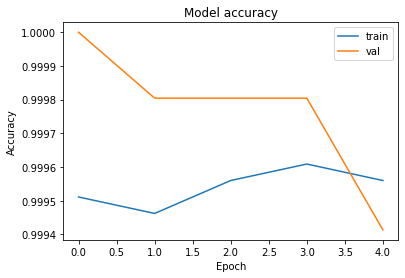

In [25]:
import keras
from matplotlib import pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

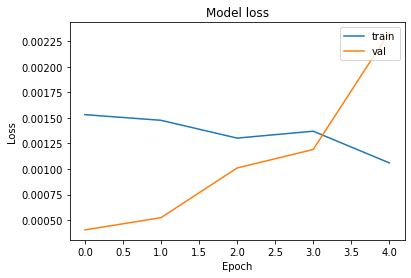

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

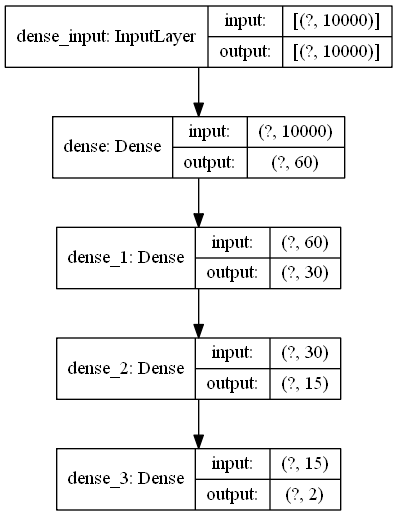

In [27]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

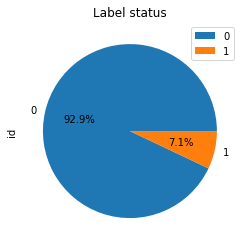

In [28]:
Label_status_wrt_id=twitter_data.groupby(['label']).sum().plot(kind='pie', y='id', autopct='%1.1f%%', title='Label status')

In [29]:
Lable_status_wrt_tweet= twitter_data[["label", "tweet"]].groupby('label').count()
print(Lable_status_wrt_tweet)

       tweet
label       
0      29720
1       2242


<function matplotlib.pyplot.show(close=None, block=None)>

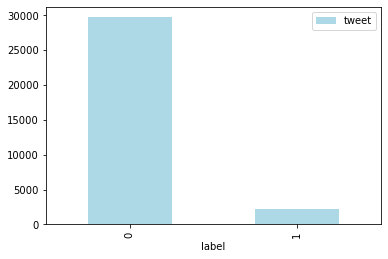

In [30]:
Lable_status_wrt_tweet.plot.bar(color=['lightblue'])
plt.show